In [76]:
#load the data
import numpy as np
import pandas as pd
import random
import mir_utils as miru
import sounddevice as sd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

testFraction=0.2

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df=pd.read_csv("feat_zc_and_centroid.csv")
tsnedf=df
#preperocessing
le = preprocessing.LabelEncoder()
le.fit(df.label)
le.transform(df.label)
df.label=le.transform(df.label)
print(np.sum(df.dtypes!=np.float64)) #make sure this is 1, our label column is string
#df.label=le.inverse_transform(df.label) #inverse of transform if u need it

X=df.loc[:,df.columns!="label"]
y=df["label"]


1


In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testFraction, random_state=42)
classifier =   RandomForestClassifier(max_depth=10, n_estimators=20, max_features=2)
classifier.fit(X_train, y_train,)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(le.inverse_transform(y_test),le.inverse_transform(y_pred)))

[[15  1  0  0  0]
 [ 0 11  0  0  3]
 [ 0  1  3  3  2]
 [ 0  0  0  7  1]
 [ 2  1  1  0 15]]
              precision    recall  f1-score   support

  hihat_open       0.88      0.94      0.91        16
        kick       0.79      0.79      0.79        14
         rim       0.75      0.33      0.46         9
       snare       0.70      0.88      0.78         8
    tom_high       0.71      0.79      0.75        19

    accuracy                           0.77        66
   macro avg       0.77      0.74      0.74        66
weighted avg       0.77      0.77      0.76        66



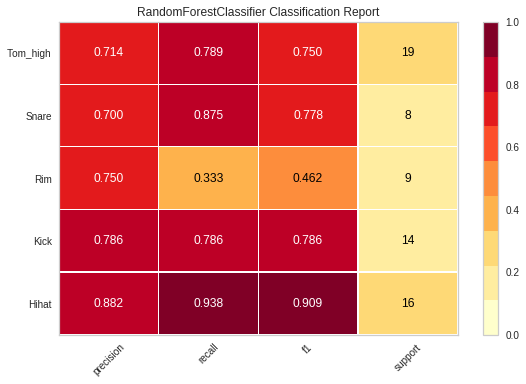

In [79]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(classifier,classes=['Hihat','Kick','Rim','Snare','Tom_high',], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()    